<a href="https://colab.research.google.com/github/vitroid/yamanashi-water/blob/main/air/nox3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
    # On Google Colab
    from google.colab import drive
    drive.mount('/content/drive')

    BASEDIR="drive/MyDrive/DataAnalysis/相模湖・津久井湖土地・水質/yamanashi-water/air/"
except:
    BASEDIR="./"

濃度でフィットした場合と、全負荷でフィットした場合の中間を狙う。

$$N=F_rc_r=c\left[B+CF_r\right]+D+EF_r+e^{Gt}$$

の対数をとる。

$$\ln N=\ln F_r+\ln c_r=\ln \left(c\left[B+CF_r\right]+D+EF_r\right)+Gt$$


In [2]:
import pandas as pd

flows = pd.read_csv(f"{BASEDIR}../flow/9bridges2000.csv") # 2000年4月以降の252ヵ月
flows

,Unnamed: 0,"('昭和橋', '流量')","('昭和橋', '全窒素')","('大月橋', '流量')","('大月橋', '全窒素')","('桂川橋', '流量')","('桂川橋', '全窒素')","('富士見橋', '流量')","('富士見橋', '全窒素')","('鶴川橋', '流量')",...,"('西方寺橋', '流量')","('西方寺橋', '全窒素')","('落合橋', '流量')","('落合橋', '全窒素')","('流川', '流量')","('流川', '全窒素')","('道志川', '流量')","('道志川', '全窒素')","('秋山川', '流量')","('秋山川', '全窒素')"
0,0,1.0200,1.60,2.0700,1.7,32.3200,1.6,2.9300,1.20,1.9800,...,0.9400,1.30,0.1400,1.30,3.1500,2.2,7.5700,0.88,2.1400,1.50
1,1,0.9700,1.30,5.5200,1.6,39.1000,1.5,2.6200,1.20,0.6300,...,0.9900,1.50,0.2600,1.30,2.7500,2.0,3.9600,0.68,0.9300,1.00
2,2,0.5700,1.50,2.3100,1.6,48.7000,1.5,2.3800,1.20,0.3500,...,0.7400,1.20,0.1200,1.40,2.7900,1.8,1.7900,0.63,0.3800,1.00
3,3,1.3400,1.40,5.3000,1.7,41.0000,1.5,3.8500,1.30,2.3200,...,2.4800,1.00,0.5500,1.20,2.7300,1.8,5.4700,0.70,2.1700,1.20
4,4,5.1800,0.29,4.8000,1.4,43.9800,1.3,4.3100,1.10,1.5800,...,1.8400,0.95,0.3300,1.20,3.5300,1.5,5.1900,0.62,1.3300,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,247,4.4277,0.57,2.9422,1.0,35.3546,1.1,4.5551,1.00,1.9370,...,2.4134,0.79,0.7972,0.76,3.2027,1.3,5.7238,0.46,1.5480,0.59
248,248,4.4304,0.66,2.2754,1.1,32.6497,1.2,4.5471,1.00,0.8985,...,1.2589,0.75,0.1979,0.83,1.7326,1.2,2.8614,0.37,0.6905,0.58
249,249,0.9716,1.30,1.8195,1.2,23.0379,1.3,4.8280,0.98,0.4651,...,1.0088,0.98,0.1561,0.83,1.4969,1.4,2.0964,0.40,0.4306,0.64
250,250,1.8441,1.00,1.6346,1.3,22.1846,1.2,4.7207,0.97,0.4367,...,0.9354,1.10,0.0587,0.88,1.5867,1.3,1.9493,0.44,0.4629,0.70


In [3]:
import pandas as pd
import numpy as np


# read_csvが読み損じるので、自分で読む。
def read_csv(filename, sep=",", encoding="utf8"):
    rows = []
    with open(filename, encoding=encoding) as f:
        for line in f.readlines():
            cols = line.split(sep)[:143]
            rows.append(cols)
    df = pd.DataFrame(rows[1:])
    df.columns = rows[0][:143]
    print(rows[0][:143])
    return df


cols = """月平均値(ppm)_４月
同左_５月.2
同左_６月.2
同左_７月.2
同左_８月.2
同左_９月.2
同左_10月.2
同左_11月.2
同左_12月.2
同左_１月.2
同左_２月.2
同左_３月.2
""".splitlines()

# 2008年のデータはコラム名をつけまちがっている!!!信じられん。

stations = [19202030, 19204010, 19206010]

nox = []
for year in range(2000, 2021):
    if year >= 2003:
        cols = "月平均値(ppm)_４月,月平均値(ppm)_５月,月平均値(ppm)_６月,月平均値(ppm)_７月,月平均値(ppm)_８月,月平均値(ppm)_９月,月平均値(ppm)_10月,月平均値(ppm)_11月,月平均値(ppm)_12月,月平均値(ppm)_１月,月平均値(ppm)_２月,月平均値(ppm)_３月".split(
            ","
        )
    filename = f"{BASEDIR}../TD20231218_155555_51/TD{year}0419.txt"
    cols_in_file = list(
        pd.read_csv(
            filename,
            sep=",",
            nrows=1,
            encoding="cp932",
        )
    )
    print(len(cols_in_file))
    df = pd.read_csv(
        filename,
        encoding="cp932",
        sep=",",
        usecols=cols_in_file,
    )
    df = df.loc[:, ~df.columns.duplicated()]
    print(year, df)
    for i, col in enumerate(cols):
        month = i + 4
        y = year
        if month > 12:
            y += 1
            month -= 12
        row = []
        for station in stations:
            rows = df[df["測定局コード"] == station]
            if len(rows) > 0:
                row.append(rows.iloc[0][col])
            else:
                row.append(np.NaN)
        print(row)
        nox.append([float(x) for x in row])

nox = pd.DataFrame(nox, columns=stations)

nox

175
2000     測定年度  項目種類コード  項目コード_数字 項目コード_英数字  測定方法コード  都道府県コード 都道府県名        同左_ローマ字  \
0   2000        1         4       NOX        1       19   山梨県  Yamanashi-keｎ   
1   2000        1         4       NOX        2       19   山梨県  Yamanashi-keｎ   
2   2000        1         4       NOX        1       19   山梨県  Yamanashi-keｎ   
3   2000        1         4       NOX        1       19   山梨県  Yamanashi-keｎ   
4   2000        1         4       NOX        1       19   山梨県  Yamanashi-keｎ   
5   2000        1         4       NOX        2       19   山梨県  Yamanashi-keｎ   
6   2000        1         4       NOX        1       19   山梨県  Yamanashi-keｎ   
7   2000        1         4       NOX        1       19   山梨県  Yamanashi-keｎ   
8   2000        1         4       NOX        1       19   山梨県  Yamanashi-keｎ   
9   2000        1         4       NOX        1       19   山梨県  Yamanashi-keｎ   
10  2000        1         4       NOX        2       19   山梨県  Yamanashi-keｎ   

    市区町村コード  市区町村名  ... Unname

,19202030,19204010,19206010
0,0.011,0.024,0.030
1,0.009,0.027,0.024
2,0.011,0.029,0.027
3,0.010,0.023,0.023
4,0.011,0.023,0.022
...,...,...,...
247,0.007,0.009,0.023
248,0.009,0.011,NaN
249,0.010,0.013,0.028
250,0.007,0.010,0.020


In [4]:
# Google Colab
! pip install japanize_matplotlib

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


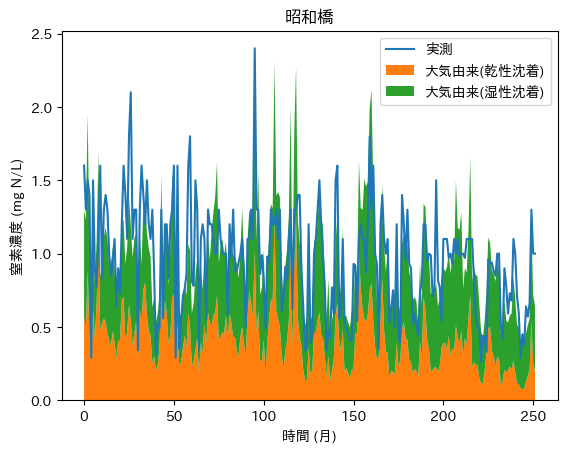

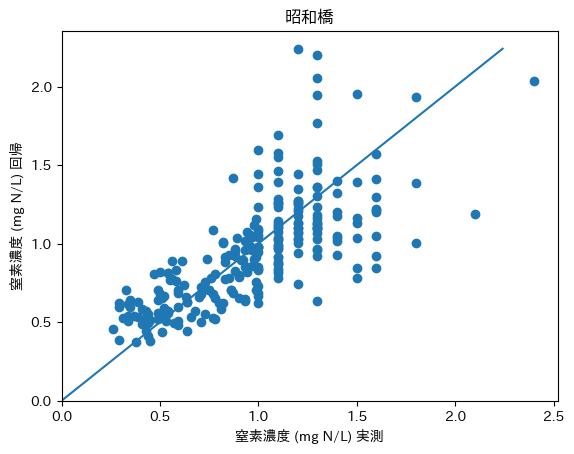

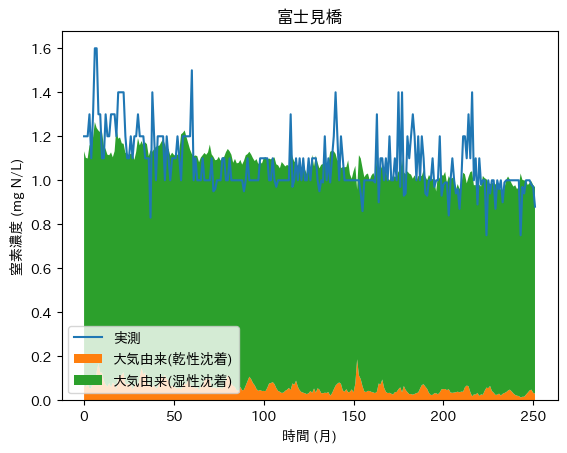

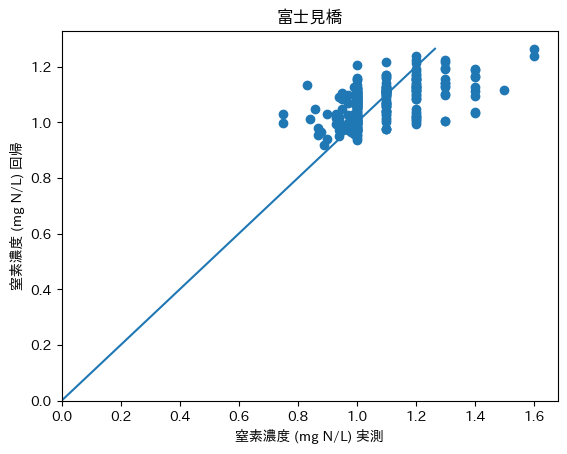

/Users/matto/.local/share/virtualenvs/yamanashi-water-pG-1wwVZ/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


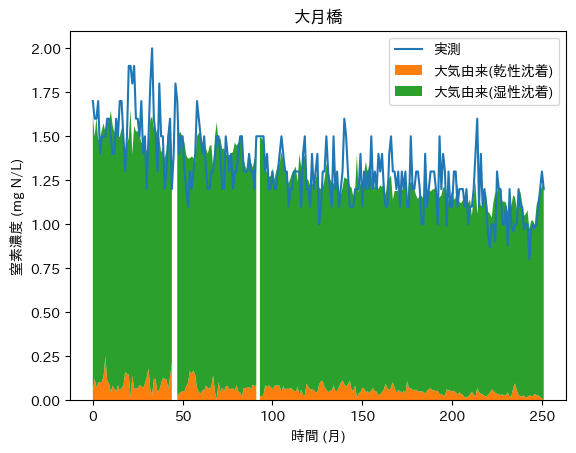

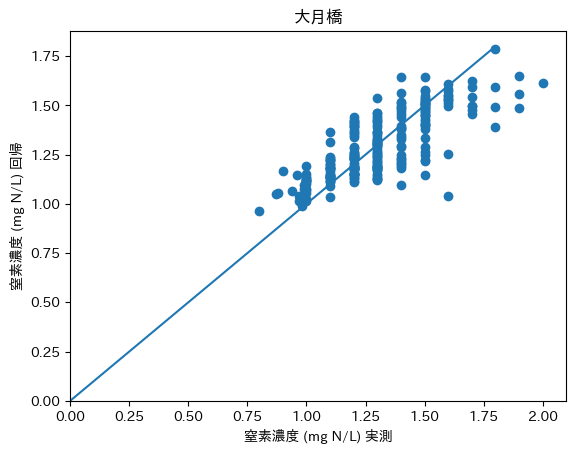

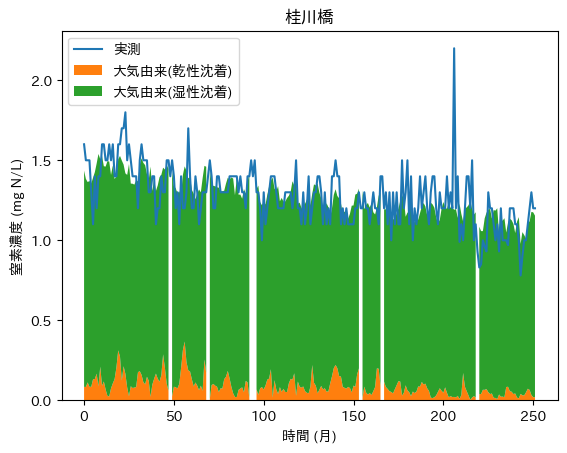

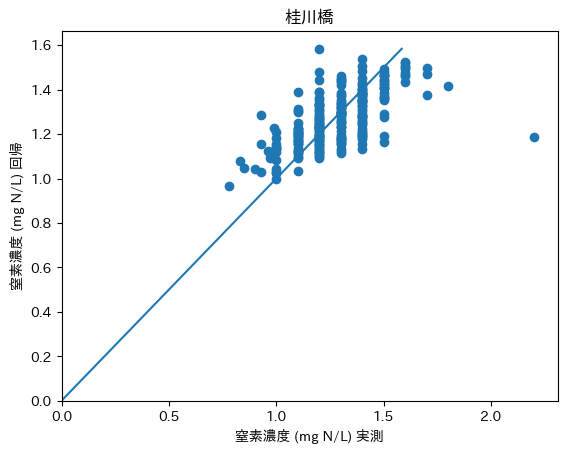

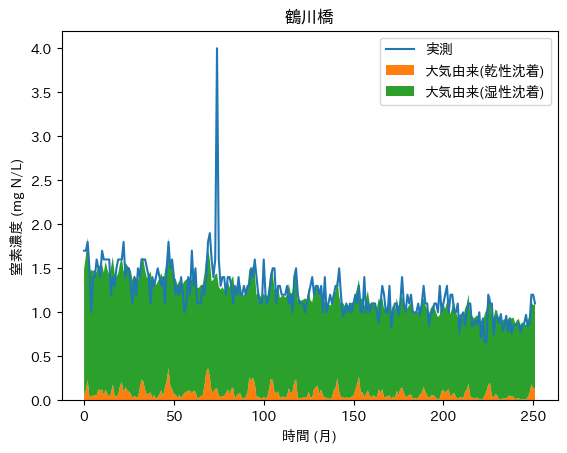

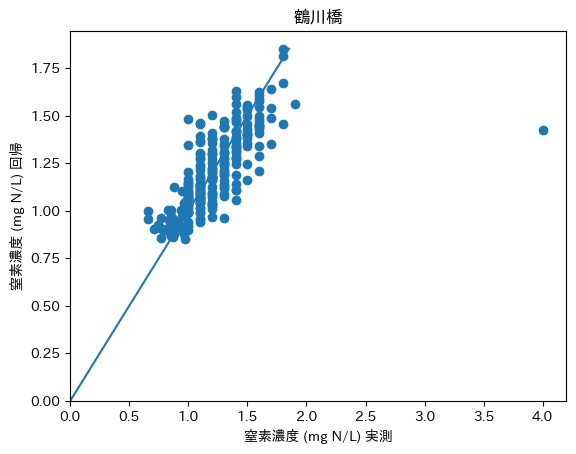

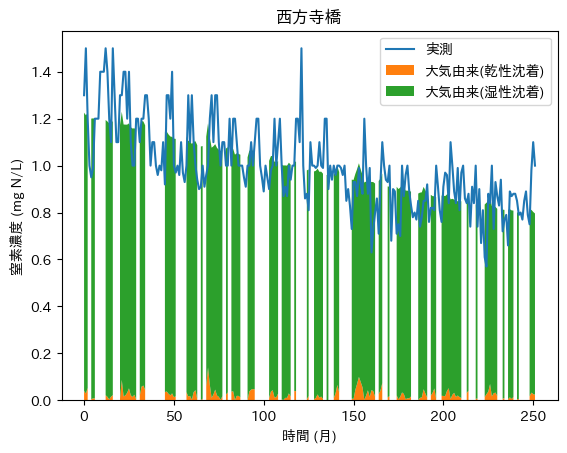

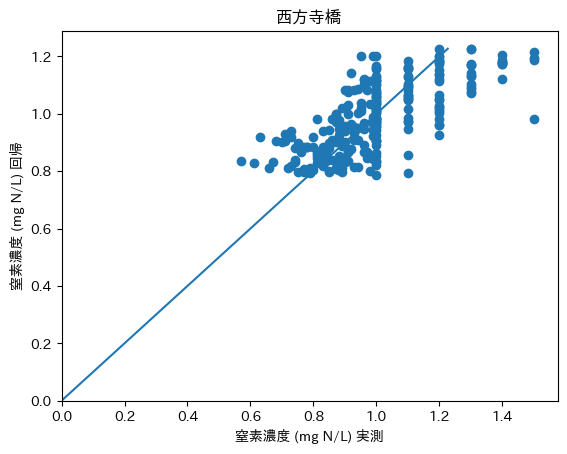

/var/folders/g2/t_qwkbf48xj4860059bm17mh0000gs/T/ipykernel_88050/2041098274.py:12: RuntimeWarning: invalid value encountered in log
  return np.log(N)+G*t


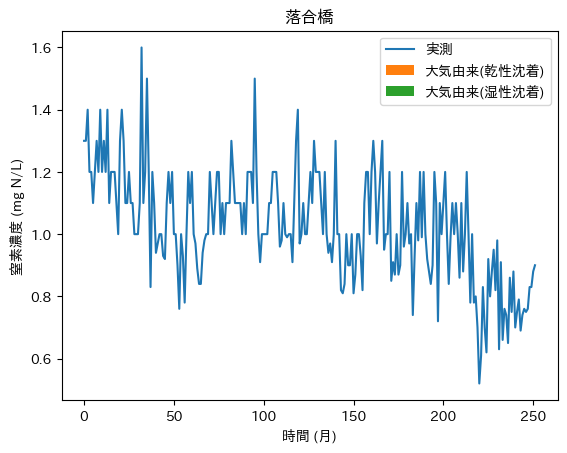

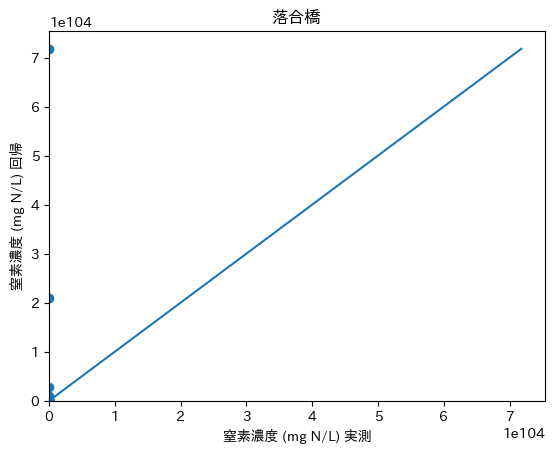

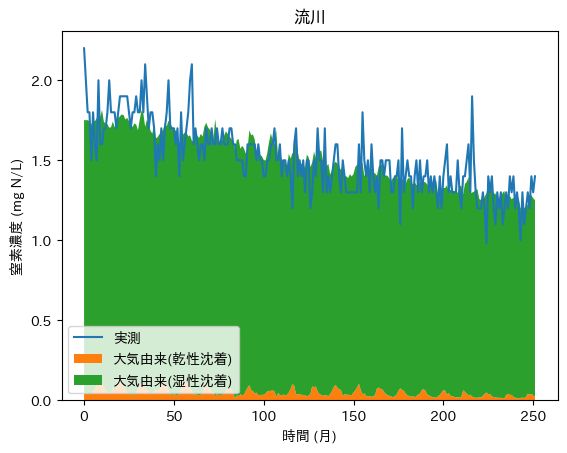

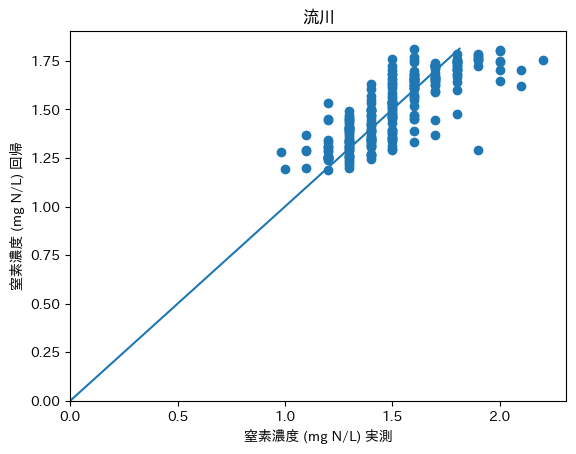

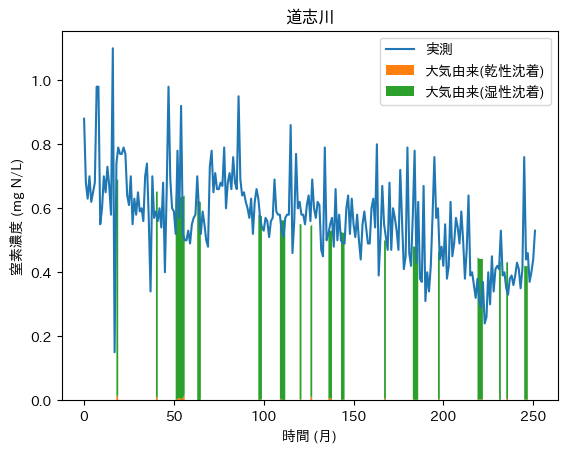

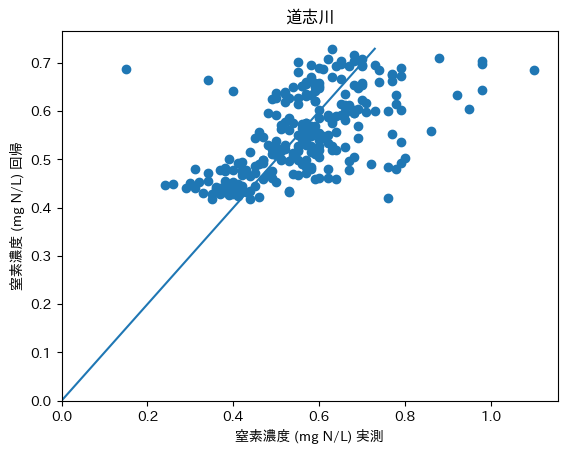

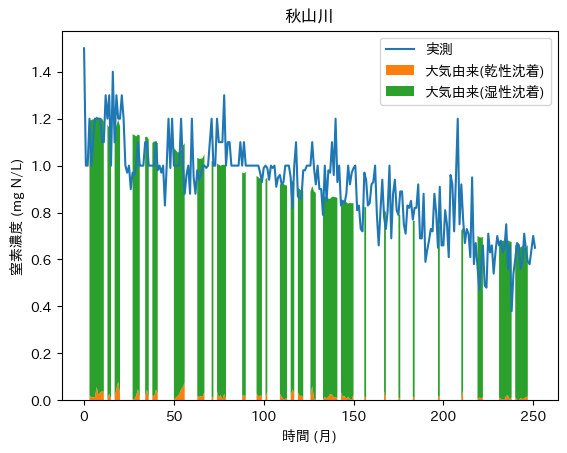

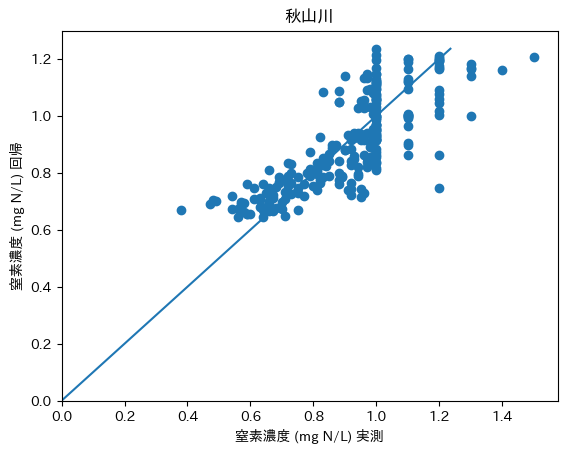

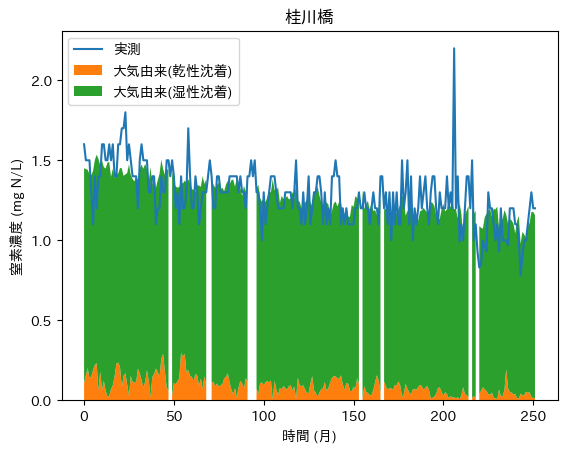

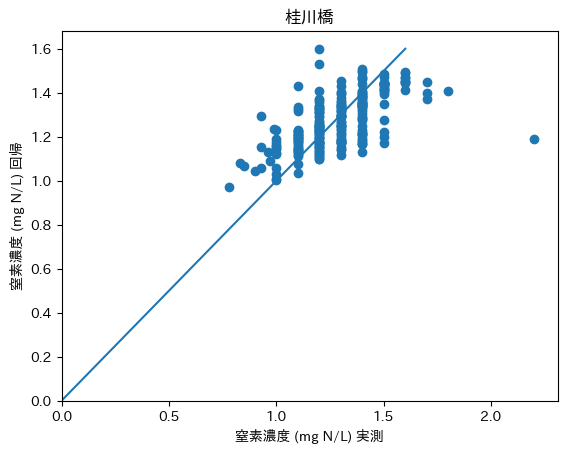

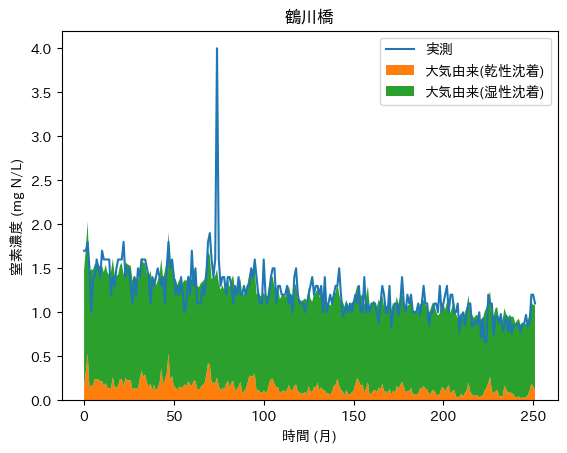

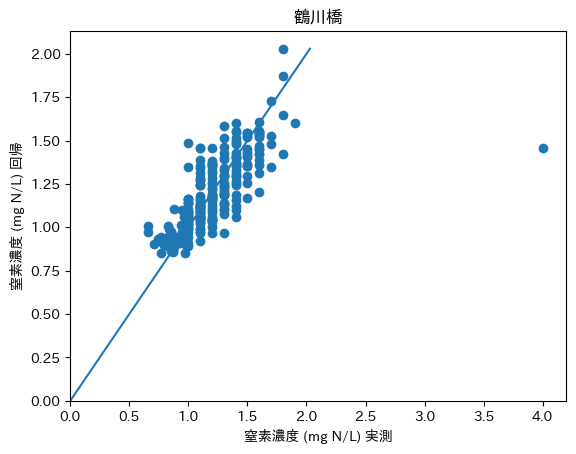

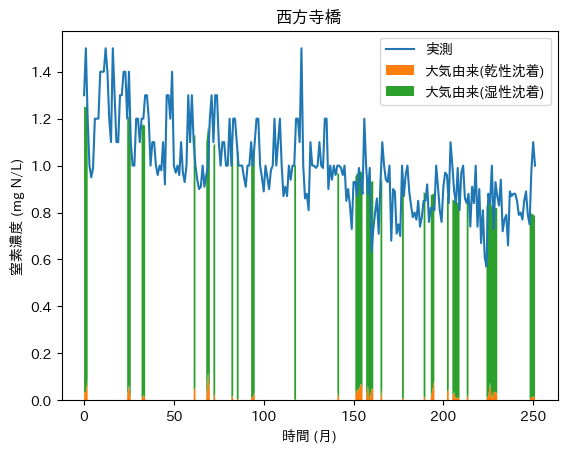

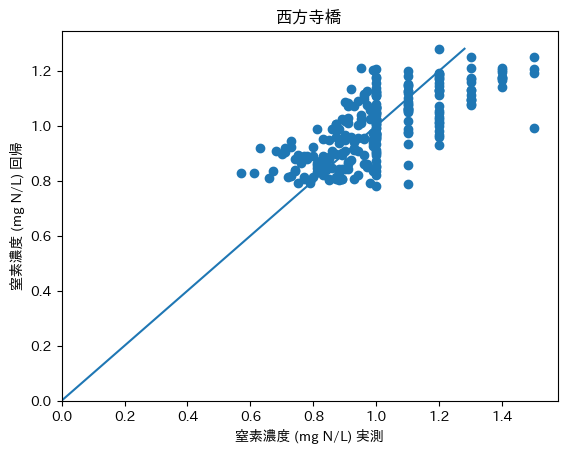

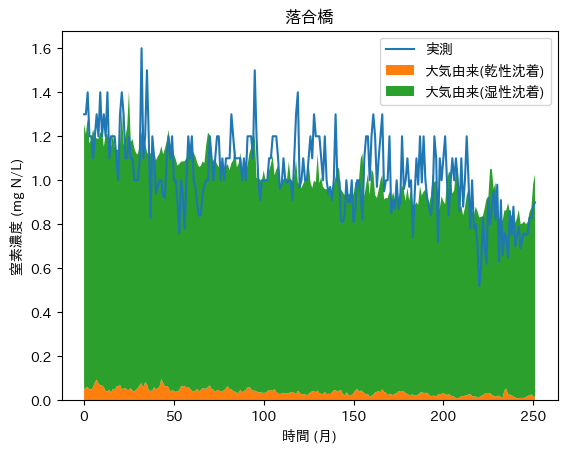

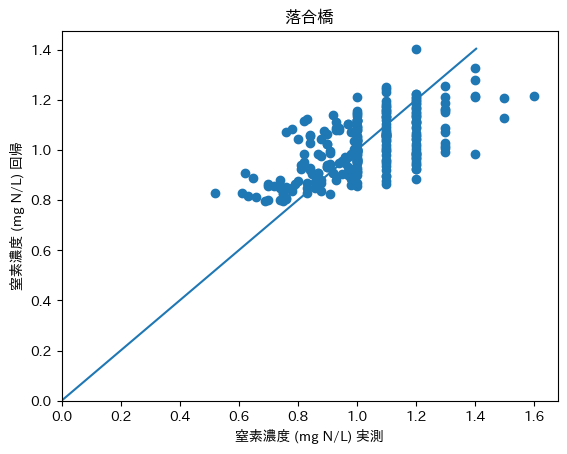

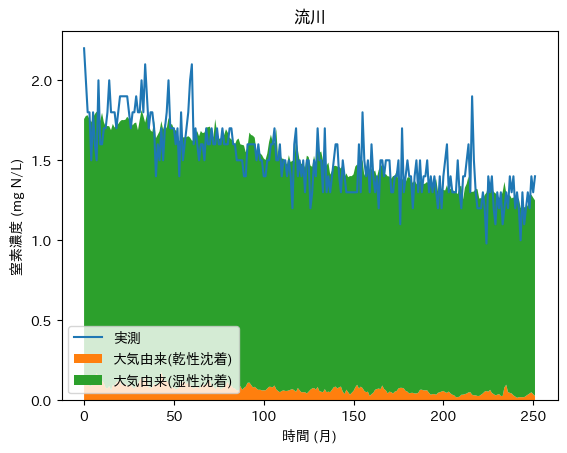

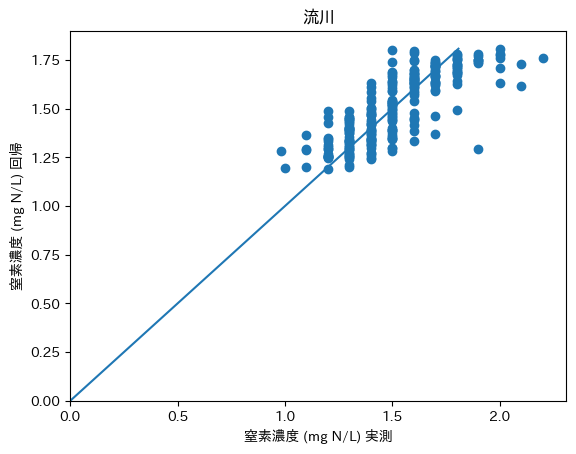

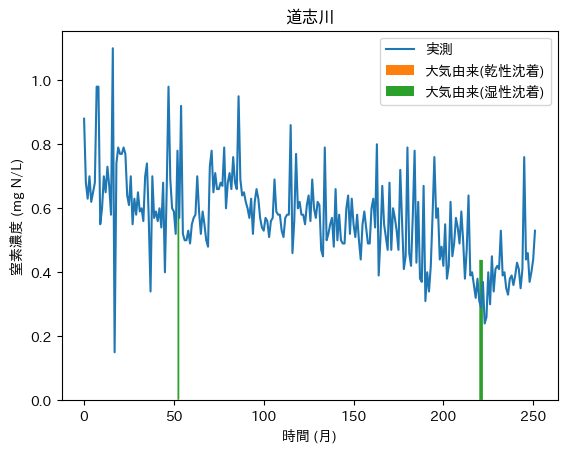

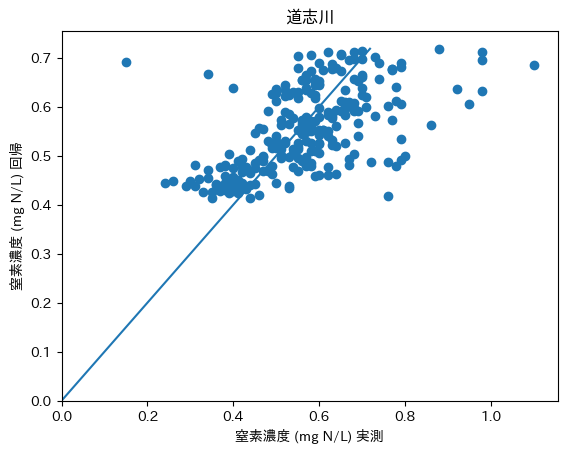

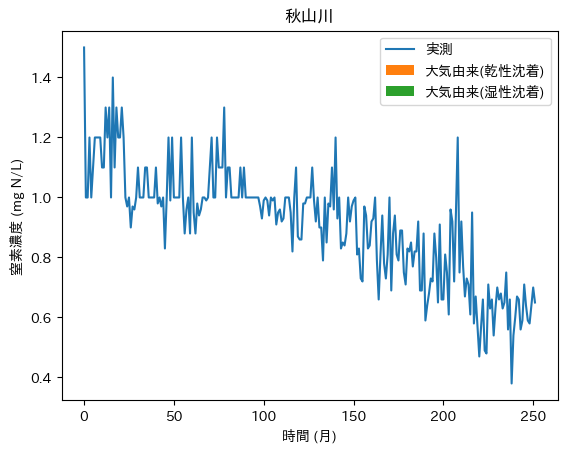

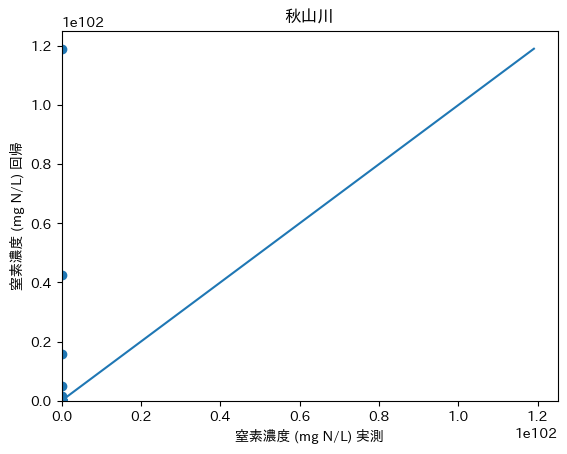

In [12]:
import numpy as np
import scipy
import japanize_matplotlib
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt


def trend(cFt, B, C, D, E,G):  # ln N
    c, F,t = cFt
    N = c * (B + C * F) + D + E * F
    return np.log(N)+G*t


bridges = [
    ("昭和橋", 19202030),
    ("富士見橋", 19202030),
    ("大月橋", 19204010),
    ("桂川橋", 19206010),
    ("鶴川橋", 19206010),
    ("西方寺橋", 19206010),
    ("落合橋", 19206010),
    ("流川", 19206010),
    ("道志川", 19206010),
    ("秋山川", 19206010),
    ("桂川橋", 19204010),
    ("鶴川橋", 19204010),
    ("西方寺橋", 19204010),
    ("落合橋", 19204010),
    ("流川", 19204010),
    ("道志川", 19204010),
    ("秋山川", 19204010),
]


for bridge, station in bridges:
    flowcol = f"('{bridge}', '流量')"  # 単位はm3/s
    noxcol = f"('{bridge}', '全窒素')"  # 単位はppm ~ g/m3

    # NOX in the air
    c = nox[station].ffill()

    # River flow
    F = flows[flowcol]

    # N load
    N = flows[flowcol] * flows[noxcol]

    # t time
    t = np.arange(len(N))

    popt, pcov = scipy.optimize.curve_fit(trend, (c, F,t), np.log(N))
    B, C, D, E,G = popt

    X = t
    Y = N / F
    plt.plot(X, Y, "-", markersize=2, label="実測")
    plt.stackplot(
        X,
        np.exp(trend((c, F,t), B, C, 0, 0,0))/F,
        np.exp(trend((c, F,t), 0, 0, D, E,G))/F,
        baseline="zero",
        labels=["大気由来(乾性沈着)", "大気由来(湿性沈着)", "その他"],
    )
    # plt.yscale("log")
    plt.title(bridge)
    plt.xlabel("時間 (月)")
    plt.ylabel("窒素濃度 (mg N/L)")
    # plt.ylim(0,100)
    plt.legend()
    plt.show()

    N_pred = np.exp(trend((c, F,t), B, C, D, E,G))

    plt.scatter(N / F, N_pred / F)
    X = np.linspace(0, np.max(N_pred / F), 10)
    plt.plot(X, X, "-")
    plt.title(bridge)
    plt.xlabel("窒素濃度 (mg N/L) 実測")
    plt.ylabel("窒素濃度 (mg N/L) 回帰")
    plt.xlim(0, None)
    plt.ylim(0, None)
    # plt.legend()
    plt.show()

# print("bridge\tstation\tB\tC\tD\tE\tG\trmse\tcorr\tair")
# for bridge, station in bridges:
#     flowcol = f"('{bridge}', '流量')"  # 単位はm3/s
#     noxcol = f"('{bridge}', '全窒素')"  # 単位はppm ~ g/m3

#     # NOX in the air
#     c = nox[station].ffill()

#     # River flow
#     F = flows[flowcol]

#     # N load
#     N = flows[flowcol] * flows[noxcol]

#     # t time
#     t = np.arange(len(N))

#     popt, pcov = scipy.optimize.curve_fit(trend, (c, F, t), N / F, p0=popt)
#     B, C, D, E, G = popt

#     print(
#         f"{bridge}\t{station}\t{B:.3f}\t{C:.3f}\t{D:.3f}\t{E:.3f}\t{G:.3f}\t",
#         end="",
#     )
#     rmse = np.mean((N - trend((c, F, t), B, C, D, E, G)) ** 2) ** 0.5
#     coeff = np.corrcoef(N, trend((c, F, t), B, C, D, E, G))[0, 1]
#     air = (
#         np.mean(trend((c, F, t), B, C, 0, 0, 0) / trend((c, F, t), B, C, D, E, G)) * 100
#     )
#     print(f"{rmse:.3f}\t{coeff:.3f}\t{air:.3f}")

うまくフィットできていない場合もあるが、予測通り、大気以外の寄与も減少傾向にあるという仮定を置くと、大気寄与はさらに小さく見積もられる。つまり、大気由来の窒素を減らしても、水質は改善しない。